<a href="https://colab.research.google.com/github/yashvisatam/Walmart_Sales_Prediction/blob/main/Walmart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

df = pd.read_csv('Walmart.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df = df.drop(['Date'], axis=1)

X = df.drop(['Weekly_Sales'], axis=1)
y = df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-24-eeb831f854d1>:14: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


Decision Tree Regression

In [ ]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
tree_pred = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)

print("Decision Tree Regression MSE: ", tree_mse)
print("Decision Tree Regression R2 Score: ", tree_r2)

Decision Tree Regression MSE:  37647100589.47298
Decision Tree Regression R2 Score:  0.8831396331997499


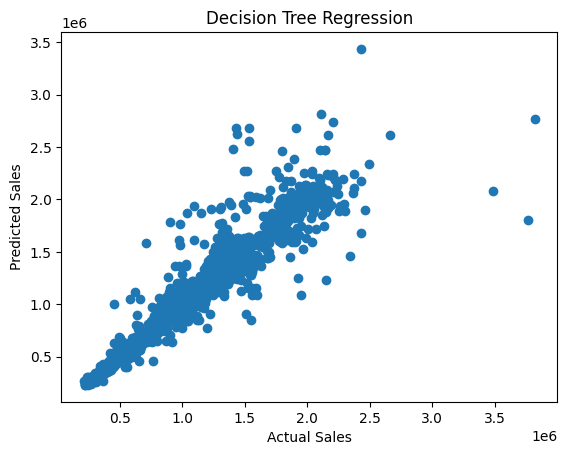

In [ ]:
plt.scatter(y_test, tree_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Decision Tree Regression")
plt.show()

Gradient Boosting Regression

In [ ]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
gb_pred = gb_reg.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

print("Gradient Boosting Regression MSE: ", gb_mse)
print("Gradient Boosting Regression R2 Score: ", gb_r2)

Gradient Boosting Regression MSE:  34602266518.53544
Gradient Boosting Regression R2 Score:  0.8925911027898185


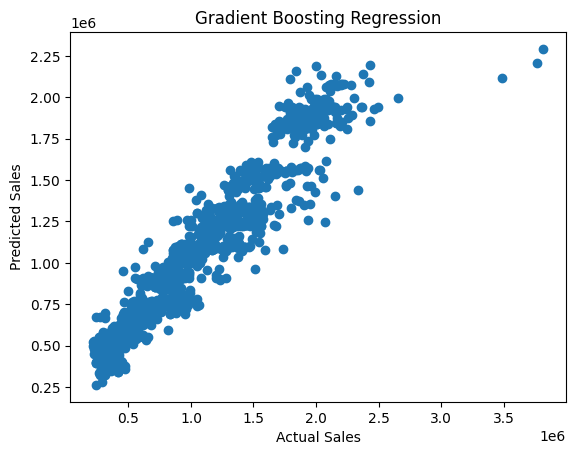

In [ ]:
plt.scatter(y_test, gb_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Gradient Boosting Regression")
plt.show()

Random Forest Regression

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Regression MSE: ", rf_mse)
print("Random Forest Regression R2 Score: ", rf_r2)

Random Forest Regression MSE:  20999673352.340332
Random Forest Regression R2 Score:  0.9348149129092258


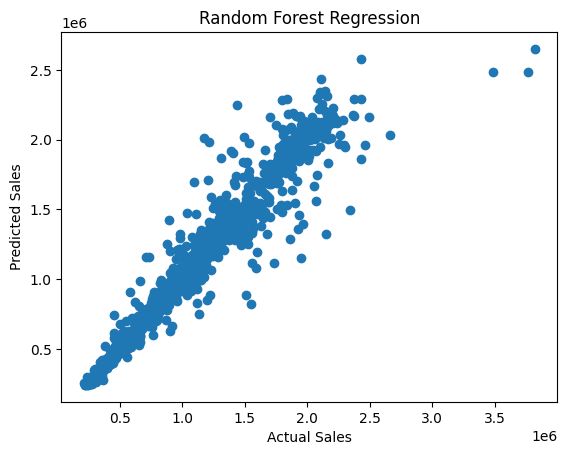

In [ ]:
plt.scatter(y_test, rf_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest Regression")
plt.show()

Support Vector Regression

In [ ]:
svr_reg = SVR()
svr_reg.fit(X_train, y_train)
svr_pred = svr_reg.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

print("Support Vector Regression MSE: ", svr_mse)
print("Support Vector Regression R2 Score: ", -1*svr_r2)

Support Vector Regression MSE:  331329612750.20166
Support Vector Regression R2 Score:  0.028480267311747687


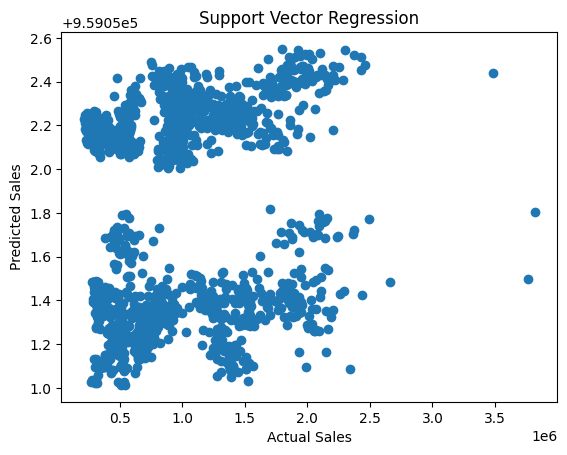

In [ ]:
plt.scatter(y_test, svr_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Support Vector Regression")
plt.show()

Performance Analysis of above algorithms

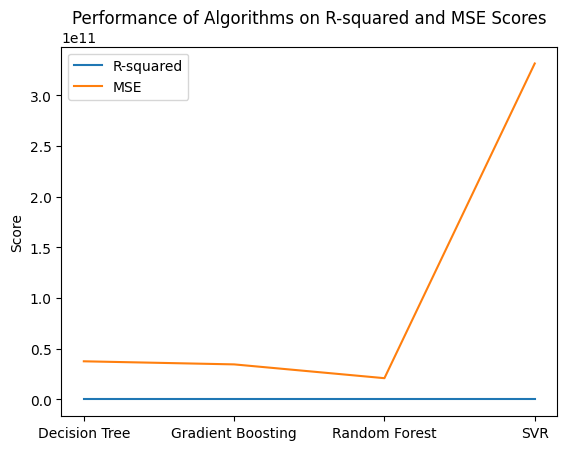

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

r2_scores = [tree_r2, gb_r2, rf_r2, svr_r2]
mse_scores = [tree_mse, gb_mse, rf_mse, svr_mse]
labels = ['Decision Tree', 'Gradient Boosting', 'Random Forest', 'SVR']

x = np.arange(len(labels))

plt.plot(x, r2_scores, label='R-squared')
plt.plot(x, mse_scores, label='MSE')
plt.xticks(x, labels)
plt.ylabel('Score')
plt.title('Performance of Algorithms on R-squared and MSE Scores')
plt.legend()
plt.show()

Prediction of a new data point

In [ ]:
new_data_point = (5, 100, 2, 0, 0, 0, 5, 2)
new_data_point = np.array(new_data_point).reshape(1, -1)
rf_reg_pred = rf_reg.predict(new_data_point)

print("Predicted Sales:", rf_reg_pred[0])

Predicted Sales: 2287411.765000001


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
